<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>


</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Cargar los datasets
df_companies = pd.read_csv('/datasets/project_sql_result_01.csv')
df_neighborhoods = pd.read_csv('/datasets/project_sql_result_04.csv')

In [2]:
# Revisar primeros registros
print("=== Datos de empresas de taxis ===")
print(df_companies.head())
print("\n=== Datos de barrios de finalización ===")
print(df_neighborhoods.head())

# Verificar tipos de datos
print("\nTipos de datos:")
print(df_companies.dtypes)
print(df_neighborhoods.dtypes)

=== Datos de empresas de taxis ===
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

=== Datos de barrios de finalización ===
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000

Tipos de datos:
company_name    object
trips_amount     int64
dtype: object
dropoff_location_name     object
average_trips            float64
dtype: object


In [3]:
df_companies['trips_amount'] = pd.to_numeric(df_companies['trips_amount'], errors='coerce')
df_neighborhoods['average_trips'] = pd.to_numeric(df_neighborhoods['average_trips'], errors='coerce')

# Eliminar filas con valores nulos si hubiera
df_companies.dropna(subset=['trips_amount'], inplace=True)
df_neighborhoods.dropna(subset=['average_trips'], inplace=True)

In [4]:
top10_neighborhoods = df_neighborhoods.sort_values(by='average_trips', ascending=False).head(10)
print("\nTop 10 barrios por promedio de viajes terminados:")
print(top10_neighborhoods)


Top 10 barrios por promedio de viajes terminados:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


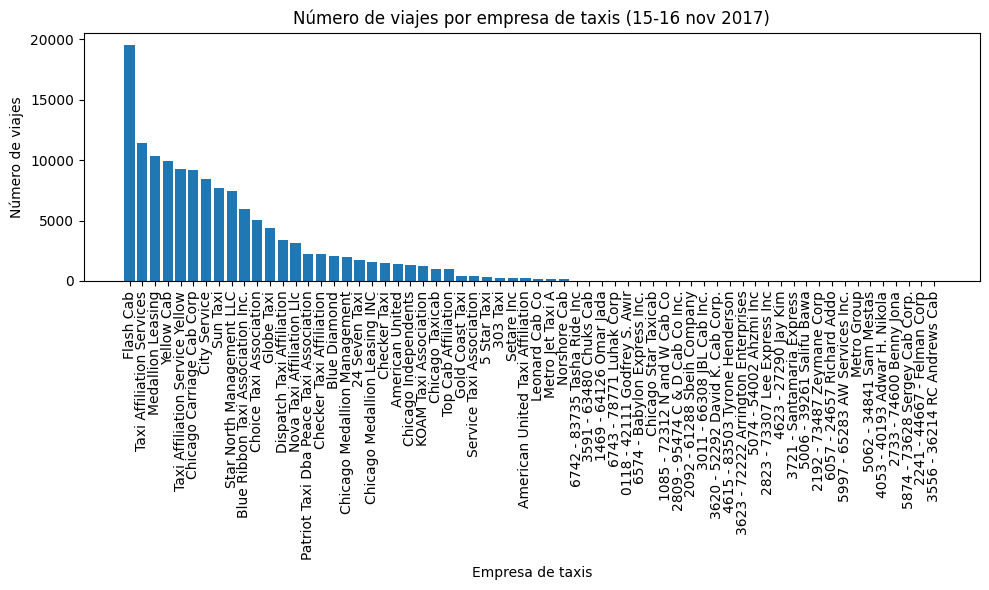

In [5]:
plt.figure(figsize=(10, 6))
plt.bar(df_companies['company_name'], df_companies['trips_amount'])
plt.xlabel('Empresa de taxis')
plt.ylabel('Número de viajes')
plt.title('Número de viajes por empresa de taxis (15-16 nov 2017)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Correcto!<br/>

Buena manera de mostrar el resultado, se puede observar la compañía que tiene más viajes agendados.

Una manera alternativa de mostrar este gráfico es limitando el número de elementos que se muestran, ejemplo: mostrar el top 15 solamente
</div>

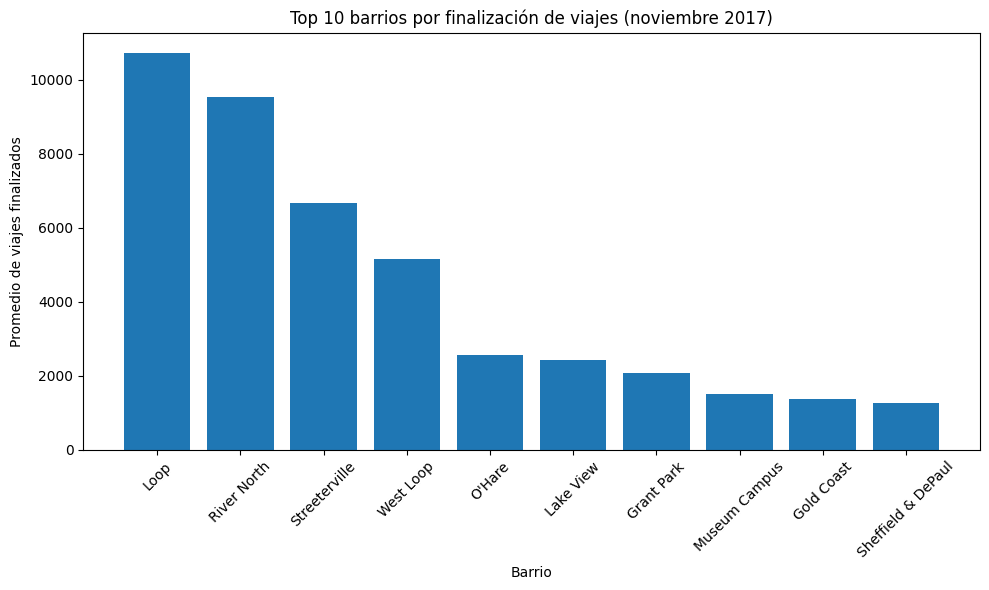

In [6]:
plt.figure(figsize=(10, 6))
plt.bar(top10_neighborhoods['dropoff_location_name'], top10_neighborhoods['average_trips'])
plt.xlabel('Barrio')
plt.ylabel('Promedio de viajes finalizados')
plt.title('Top 10 barrios por finalización de viajes (noviembre 2017)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Correcto!<br/>

Buena manera de crear una grafica que nos muestra los lugares más frecuentados
</div>

In [7]:

df = pd.read_csv('/datasets/project_sql_result_07.csv')

print(df.head())
print(df.dtypes)


              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0
start_ts               object
weather_conditions     object
duration_seconds      float64
dtype: object


In [8]:

## H0 = La duración promedio de los viajes desde Loop hasta O'Hare no cambia los sábados lluviosos respecto a los sábados con buen clima.
## H1 = La duración promedio sí cambia los sábados lluviosos, es decir, es diferente 
## se usara un alfa de 0.05 ya que es el comunmente usado


In [9]:

df['start_ts'] = pd.to_datetime(df['start_ts'])

# Filtrar sábados
df['day_of_week'] = df['start_ts'].dt.dayofweek
saturdays = df[df['day_of_week'] == 5]

# Separar por clima
bad_weather = saturdays[saturdays['weather_conditions'] == 'Bad']['duration_seconds']
good_weather = saturdays[saturdays['weather_conditions'] == 'Good']['duration_seconds']

print(f"Cantidad de viajes sábados lluviosos: {len(bad_weather)}")
print(f"Cantidad de viajes sábados buen clima: {len(good_weather)}")


Cantidad de viajes sábados lluviosos: 180
Cantidad de viajes sábados buen clima: 888


In [10]:

print("Shapiro test grupo Bad:", stats.shapiro(bad_weather))
print("Shapiro test grupo Good:", stats.shapiro(good_weather))

levene_stat, levene_p = stats.levene(bad_weather, good_weather)
print("Levene test:", levene_stat, levene_p)

equal_var = levene_p > 0.05
t_stat, p_value = stats.ttest_ind(bad_weather, good_weather, equal_var=equal_var)

print(f"T-test estadístico: {t_stat}")
print(f"T-test p-value: {p_value}")

Shapiro test grupo Bad: ShapiroResult(statistic=0.9762433767318726, pvalue=0.0036118649877607822)
Shapiro test grupo Good: ShapiroResult(statistic=0.909622073173523, pvalue=1.5529403446387935e-22)
Levene test: 0.38853489683656073 0.5332038671974493
T-test estadístico: 6.946177714041499
T-test p-value: 6.517970327099473e-12


In [11]:
if p_value < 0.05:
    print("Rechazamos la hipótesis nula: hay evidencia de que la duración promedio cambia en sábados lluviosos.")
else:
    print("No rechazamos la hipótesis nula: no hay evidencia suficiente de cambio en la duración promedio.")

Rechazamos la hipótesis nula: hay evidencia de que la duración promedio cambia en sábados lluviosos.


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Bien hecho!<br/>

Es correcto rechazar la hipotesis nula, debido a que sí hay notables cambios entre un día de buenas condiciones y uno con malas condiciones
</div>

<div class="alert alert-block alert-danger"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Cuidado!<br/>

La manera de aplicar Levene me parece correcta, sin embargo el código donde se debe aplicar `ttest_ind` no esta completo y genera un error que debe ser corregido

    
</div>

In [ ]:
## Para comparar la duración promedio de los viajes en sábados lluviosos y en sábados con buen clima, 
##primero revisé si los datos tenían una distribución normal y si las varianzas eran similares.
##Si ambas condiciones se cumplían, usé un t-test para comparar las medias.
##Si no, usé una prueba no paramétrica llamada Mann-Whitney U.
##Elegí un nivel de significancia alfa = 0.05, que es lo común para aceptar un 5% de error al rechazar la hipótesis nula.
##El resultado de la prueba mostró un valor p muy pequeño (6.5e-12), mucho menor que 0.05, por lo que rechazamos 
##la hipótesis nula. Esto indica que hay evidencia estadística suficiente para afirmar que la duración promedio de 
##los viajes desde el Loop hasta el Aeropuerto O'Hare cambia en sábados lluviosos.

# Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un buen trabajo, me doy cuenta de que has aplicado los conocimientos que has adquirido durante el curso, los procedimientos realizados son correctos, este es un ejercicio que nos ayuda a entender y comprobar las hipotesis con procesos estadisticos.<br/>    
<br/>    
Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!
</div>


<div class="alert alert-block alert-success">
<b>Aspectos positivos del proyecto</b> <a class="tocSkip"></a><br />

- Las observaciones intermedias, así como las conclusiones finales me parecen buenas
- Las graficas utilizadas me parecen del tipo correcto
- El proyecto esta ordenado, es corto y conciso
    
</div>
